# Well profitability estimation using bootstrapping technique

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Input data</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Train-and-test-the-model-for-each-region" data-toc-modified-id="Train-and-test-the-model-for-each-region-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train and test the model for each region</a></span></li><li><span><a href="#Profit-calculations" data-toc-modified-id="Profit-calculations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Profit calculations</a></span><ul class="toc-item"><li><span><a href="#Product-predictions-for-each-region" data-toc-modified-id="Product-predictions-for-each-region-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Product predictions for each region</a></span></li><li><span><a href="#Minimum-volume-per-well" data-toc-modified-id="Minimum-volume-per-well-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Minimum volume per well</a></span></li><li><span><a href="#Profit-calculator" data-toc-modified-id="Profit-calculator-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Profit calculator</a></span></li><li><span><a href="#Profit-distribution-per-region" data-toc-modified-id="Profit-distribution-per-region-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Profit distribution per region</a></span></li><li><span><a href="#Average-profit-per-region" data-toc-modified-id="Average-profit-per-region-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Average profit per region</a></span></li><li><span><a href="#Risk-assessment-per-region" data-toc-modified-id="Risk-assessment-per-region-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Risk assessment per region</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Goal

- Develop a linear regression model for the OilyGiant mining company that would analyze oil well parameters in each of the three selected regions and predict the volume of reserves in the new wells for each region;
- Based on these predictions, pick the region with the highest total profit and the lowest risk of losses.

**Steps to choose the location:**
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

## Data description

**Features**

- `id` — unique oil well identifier
- `f0, f1, f2` — three features of points (their specific meaning is unimportant, but the features themselves are significant)

**Target**

- `product` — volume of reserves in the oil well (thousand barrels).

**Conditions:**

- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

The data is synthetic: contract details and well characteristics are not disclosed.

## Imports

In [1]:
import pandas as pd
import matplotlib
import numpy as np

from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None)

print("Setup Complete")

Setup Complete


## Input data

In [2]:
try:
    df_0 = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/ML for Business/geo_data_0.csv')
    df_1 = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/ML for Business/geo_data_1.csv')
    df_2 = pd.read_csv('C:/Users/anna/Desktop/DS Yandex/ML for Business/geo_data_2.csv')
    
except:
    df_0 = pd.read_csv('/datasets/geo_data_0.csv')
    df_1 = pd.read_csv('/datasets/geo_data_1.csv')
    df_2 = pd.read_csv('/datasets/geo_data_2.csv')

## Descriptive statistics

Let's take a look at our tables

In [3]:
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Conclusion: the data has already been preprocessed, all features are numerical.

Now let's look at datatypes.

In [6]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


- no missing values found
- data types are fine

In [9]:
df_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [10]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [11]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


- Features `f0`, `f1`, `f2` in all 3 data frames seem to be normally distributed as their mean and median values are close to each other. Maximum values are mostly within 3 std from the mean value.
- The target variable is continuous, so we will need to use a **regression model** for predictions. The targets' distributions are quite normal as well.

## Train and test the model for each region

I'll split the data into a training set and validation set at a ratio of 75:25

In [12]:
def modeling(df):
    X = df.drop(['id','product'], axis=1)
    y = df['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state=12345)
    
    sc = ss()
    X_train_scaled = sc.fit_transform(X_train)
    X_valid_scaled = sc.transform(X_valid)
    X_train = pd.DataFrame(data=X_train_scaled,
                        index=X_train.index,    
                        columns=X_train.columns)
    X_valid = pd.DataFrame(data=X_valid_scaled,    
                        index=X_valid.index,    
                        columns=X_valid.columns)
    
    base_model = DummyRegressor(strategy='mean')
    base_model.fit(X_train, y_train)
    y_prelim_pred = base_model.predict(X_valid)
    rmse_baseline = round(mean_squared_error(y_valid,y_prelim_pred)** 0.5,2)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    predicted_valid = model.predict(X_valid)
    mse = mean_squared_error(y_valid, predicted_valid)
    rmse = round(mse ** 0.5, 2)
    predicted_valid_mean = round(predicted_valid.mean(),2)
    
    return model, X_valid, y_valid, rmse_baseline, rmse, predicted_valid_mean

In [13]:
model_0, X_valid_0, y_valid_0, rmse_baseline_0, rmse_0, predicted_valid_mean_0 = modeling(df_0)
model_1, X_valid_1, y_valid_1, rmse_baseline_1, rmse_1, predicted_valid_mean_1 = modeling(df_1)
model_2, X_valid_2, y_valid_2, rmse_baseline_2, rmse_2, predicted_valid_mean_2 = modeling(df_2)

Print the average volume of predicted reserves and model RMSE

In [14]:
models = pd.DataFrame({
    'Region': ['Region_0', 'Region_1', 'Region_2'],
    'Baseline RMSE': [rmse_baseline_0, rmse_baseline_1, rmse_baseline_2],
    'Model RMSE': [rmse_0, rmse_1, rmse_2],
    'Actual average volume': [round(df_0['product'].mean(),2), round(df_1['product'].mean(),2), round(df_2['product'].mean(),2)],
    'Predicted average volume': [predicted_valid_mean_0, predicted_valid_mean_1, predicted_valid_mean_2]
})
models['% of error'] = round(models['Model RMSE'] / models['Predicted average volume'], 2) * 100
models

,Region,Baseline RMSE,Model RMSE,Actual average volume,Predicted average volume,% of error
0,Region_0,44.29,37.58,92.50,92.59,41.0
1,Region_1,46.02,0.89,68.83,68.73,1.0
2,Region_2,44.90,40.03,95.00,94.97,42.0


Each of the 3 models' RMSE is lower than the respective baseline RMSE, so the models are better than the average estimate but not much better, except for the model in Region 1: it shows an error of less than 1 thousand barrel. However, in this region the average predicted volume of reserves is much lower than in the other two regions. 

It might be easier to see if we calculate the percentage by which the model is off compared to the average predicted volume of reserves (column `% of error`). The error is quite high (over 40%) in regions 0 and 2 and it is very low (only 1%) in region 1.

Overall, the actual and predicted volumes of reserves are very close in all 3 regions.

## Profit calculations

At this step I'll 
- Store all key values for calculations in separate variables.
- Calculate the volume of reserves sufficient for developing a new well without losses. 
- Compare the obtained value with the average volume of reserves in each region.
- Provide the findings about the preparation for profit calculation step.

### Product predictions for each region

In [15]:
region_0_vals = pd.DataFrame()
region_0_vals['predicted']= model_0.predict(X_valid_0)
region_0_vals['actual']= y_valid_0.values

region_1_vals = pd.DataFrame()
region_1_vals['predicted']= model_1.predict(X_valid_1)
region_1_vals['actual']= y_valid_1.values

region_2_vals = pd.DataFrame()
region_2_vals['predicted']= model_2.predict(X_valid_2)
region_2_vals['actual']= y_valid_2.values

### Minimum volume per well
First, let's calculate the volume of reserves sufficient for developing a new well without losses. Then we will compare the obtained value with the average volume of reserves in each region.

In [16]:
min_volume = round(100000000/(4500*200),2)
min_volume

111.11

- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue.
- The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

Based on the above assumptions I have calculated that the minimum volume of reserves per well in the new region must be **111.11 thousand barrels** in order to break even.

- Each of the 3 regions' **average** volume of predicted reserves is lower than this number. 
- If we were to randomly take 200 wells in each region we would be at a loss, on average. 
- To be able to make profit, let's select the most profitable wells in each region and see if the total reserves will cover the development cost.

### Profit calculator

At this step I'll write a function to calculate profit from a set of selected oil wells and model predictions:
- Pick the wells with the highest values of predictions.
- Summarize the target volume of reserves in accordance with these predictions
- Provide findings: suggest a region for oil wells' development and justify the choice. Calculate the profit for the obtained volume of reserves.

**Predicted profit calculation per region**

In practice, instead of drilling all the wells in each region (and investing a lot of money in it), the company chooses 500 random wells, measure the features' values (`f0`, `f1`, `f2`) for each of them and then selects the best 200 wells for the profit calculation.

Let's create a `RandomState()` instance from the `numpy.random module` which can be passed to the random_state argument of any function. 
It is important that with each new call, its state will change to random. This way we will get different subsamples.

Besides, subsamples should provide a selection of elements with replacement. That is, the same element can fall into a subsample several times. To do this, we will specify `replace=True` for the `sample()` function. 

First, let's create a helper function to calculate profit and then apply it to each region.

In [17]:
def profit_calculator(region_vals):
    state = np.random.RandomState(12345)
    developement_cost = 100000000

    profit_range = []
    for i in range(10000):
        subsample = region_vals.sample(n=500, replace=True, random_state=state).sort_values('predicted', ascending=False).iloc[0:200,].actual
        revenue = subsample.sum() * 4500
        profit = revenue - developement_cost
        profit_range.append(profit)
    return profit_range

### Profit distribution per region

In [18]:
profit_range_0 = pd.Series(profit_calculator(region_0_vals))
profit_range_1 = pd.Series(profit_calculator(region_1_vals))
profit_range_2 = pd.Series(profit_calculator(region_2_vals))

Text(0.5, 0, '10 million USD')

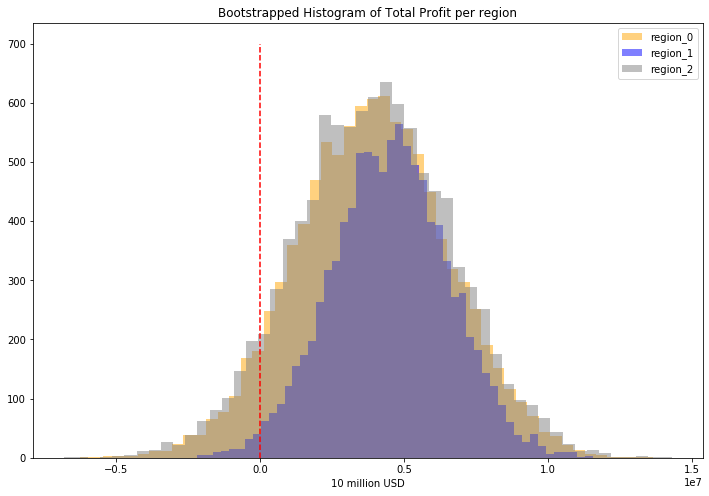

In [19]:
plt.figure(figsize=(12,8))
plt.hist(profit_range_0, alpha=0.5, bins=50, label='region_0', color ='orange')
plt.hist(profit_range_1, alpha=0.5, bins=50, label='region_1', color ='blue')
plt.hist(profit_range_2, alpha=0.5, bins=50, label='region_2', color ='gray')
plt.legend(loc='upper right')
plt.plot([0,0],[0,700],'r--')
plt.title('Bootstrapped Histogram of Total Profit per region')
plt.xlabel('10 million USD')

- As we can see, the biggest part of the profit range for all 3 regions is above the break-even point. 
- However, `region 1` contains the most positive values. Based on that, we suggest that `region 1` should be selected for development of oil wells. 
- Next, we will perform risk assessment and make sure this conclusion holds.

### Average profit per region

In [20]:
average_product_top_200_r0 = round((profit_range_0.mean()+100000000)/(200*4500),2)
average_product_top_200_r1 = round((profit_range_1.mean()+100000000)/(200*4500),2)
average_product_top_200_r2 = round((profit_range_2.mean()+100000000)/(200*4500),2)
top_200 = pd.DataFrame(index=[0,1,2],
                        data={'Average product per best well, th barrel': [average_product_top_200_r0,average_product_top_200_r1, average_product_top_200_r2],
                        'Minimum volume': [111.11,111.11,111.11],
                        'Average profit per region, in 10 mln usd': [round(profit_range_0.mean()/10000000,2), round(profit_range_1.mean()/10000000,2), round(profit_range_2.mean()/10000000,2)]
                       })
top_200.index.name = 'Region'
top_200

,"Average product per best well, th barrel",Minimum volume,"Average profit per region, in 10 mln usd"
Region,,,
0,115.44,111.11,0.39
1,116.14,111.11,0.45
2,115.49,111.11,0.39


The average volume of product in all regions is higher than the minimum required level. `Region 1` has the highest average target volume.

### Risk assessment per region

The company's requirement for a new region is to have the risk of losses lower than 2.5%. First, let's estimate the 95% confidence interval (CI) that the profit will fall into a particular range.

In [21]:
def CI_calculator(lower, upper, profit_range):
    CI_lower = np.percentile(profit_range, lower)/10000000
    CI_upper = np.percentile(profit_range, upper)/10000000
    return CI_lower, CI_upper

In [22]:
lower_CI_r0, upper_CI_r0 = CI_calculator(2.5, 97.5, profit_range_0)
lower_CI_r1, upper_CI_r1 = CI_calculator(2.5, 97.5, profit_range_1)
lower_CI_r2, upper_CI_r2 = CI_calculator(2.5, 97.5, profit_range_2)

Now, let's calculate the risk of losses for each region.

In [23]:
risk_r0 = round((profit_range_0.sort_values(ascending=True) < 0).mean(),2)*100
risk_r1 = round((profit_range_1.sort_values(ascending=True) < 0).mean(),2)*100
risk_r2 = round((profit_range_2.sort_values(ascending=True) < 0).mean(),2)*100

In [24]:
CI = pd.DataFrame(index=[0,1,2],
                        data={'Lower border': [lower_CI_r0, lower_CI_r1, lower_CI_r2],
                        'Upper border': [upper_CI_r0, upper_CI_r1, upper_CI_r2],
                        'CI,%': [95,95,95],
                        'Risk of losses, %': [risk_r0, risk_r1, risk_r2]
                       })
CI.index.name = 'Region'
CI

,Lower border,Upper border,"CI,%","Risk of losses, %"
Region,,,,
0,-0.127130,0.903652,95,7.0
1,0.051039,0.845864,95,1.0
2,-0.137181,0.929700,95,7.0


- Based on the above table, risks of losses for `regions 0 and 2` are 7% for `region 1` is only 1%

- These results confirm my previous conclusion: **Region 1 is the best option for the future development of oil wells because it has the highest total profit and the lowest risk of losses**.

## Conclusion

In this project I have developed a linear regression model for the OilyGiant mining company that analyzes oil well parameters in each of the three selected regions and predicts the volume of reserves in the new wells for each region.

Based on these predictions, I have identified the region with the highest total profit and the lowest risk of losses.

**Summary:**

1. First step was the **descriptive statistics**. I found that data was already preprocessed.

2. In the following section I have **developed a model for each region**. For that purpose I split the data into train and validation sets with the 75/25 proportion, respectively. Then scaled it using the Standard Scaler method. Next, calculated the baseline RMSE to be able to compare our models' score with a dummy regressor.

>Each of the 3 models' RMSE turned out to be lower than the respective baseline RMSE, so the models are better than the average estimate but not much better, except for the model in `Region 1`: it has an error of less than 1 thousand barrel. However, in this region the average predicted volume of reserves was much lower than in the other two regions.

>Then we calculated the percentage by which the model is off compared to the average predicted volume of reserves. The error is quite high (over 40%) in `regions 0 and 2` and very low (only 1%) in `region 1`. Overall, the actual and predicted volumes of reserves are very close in all 3 regions.

3. Next step was **profit calculation**. 

>First, I calculated the volume of reserves sufficient for developing a new well without losses (a break-even point). The minimum volume of reserves per well in the new region must be **111.11* thousand barrels** in order to break even.

>Each of the 3 regions' average volume of predicted reserves is lower than this number. If we were to randomly take 200 wells in each region we would be at a loss, on average. To be able to make profit, let's select the most profitable wells in each region and see if the total reserves will cover the development cost.

>In practice, instead of drilling all the wells in each region (and investing a lot of money in it), the company chooses 500 random wells, measure the features' values (`f0`, `f1`, `f2`) for each of them and then selects the best 200 wells for the profit calculation. 

>So I estimated the **profit distribution for the top 200 wells in each region**. For that I created 10000 samples of 500 random wells from the historic data using the **bootstrapping technique**. 

>Next, I used the models to rank those wells and select 200 best ones in terms of the volume of product. 

>Finally, I used the respective actual volume of product for each well and calculated the total profit for that sample. I obtained 10000 values for possible profit and plotted distribution based on that data.

>The biggest part of the profit range for all 3 regions is above the break-even point. However, `region 1` contains the most positive values. Based on that, I suggested that `Region 1` should be selected for development of oil wells.

4. Next, I performed **risk assessment** to make sure this conclusion holds.

>The company's requirement for a new region is to have the risk of losses lower than 2.5%. 

>First, I estimated the 95% confidence interval (CI) that the profit will fall into a particular range. Then we calculated the risk of losses for each region.

>The risks of losses for `region 0` and `region 2` are equal 7%. Besides, with the 95% confidence we can expect the loses `region 1` will be 1%.

>These results confirmed my previous conclusion: 

**Region 1 is the best option for the future development of oil wells because it has the highest total profit and the lowest risk of losses**.